In [1]:
import pandas as pd

# df = pd.read_csv("/Users/sayakghosh/Downloads/billboard_lyrics.csv")
df = pd.read_csv("/Users/sayakghosh/Downloads/final_External.csv")
df.shape

(23107, 79)

In [2]:
df = df[pd.notnull(df['release_year'])]
df = df[df['song_popularity']>0]
df.shape

(22860, 79)

In [3]:
df['song_popularity'].isnull().sum()

0

In [4]:
songs_df = df[df['best_rank']==1]
max_popularity = songs_df['song_popularity'].max()
min_popularity = songs_df['song_popularity'].min()
mean_popularity = songs_df['song_popularity'].mean()



songs_df['song_popularity_normalized'] = 100*(songs_df['song_popularity'] - min_popularity)/(max_popularity-min_popularity)
songs_df.shape

/Users/sayakghosh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(909, 80)

In [5]:
songs_df_group_mean = songs_df.groupby(['release_year'])['song_popularity'].mean().reset_index()
songs_df_group_std = songs_df.groupby(['release_year'])['song_popularity'].std().reset_index()

max_std = songs_df_group_std['song_popularity'].max()
max_std

mean_std = songs_df_group_std['song_popularity'].mean()
mean_std

12.067451866655203

In [6]:
one_song = songs_df[songs_df['release_year']==1958]
one_song[['title_x','song_popularity_normalized']]

,title_x,song_popularity_normalized
4,little star,36.559140
7,nel blu dipinto di blu (volaré),35.483871
22,poor little fool,49.462366
118,it's all in the game,41.935484
168,it's only make believe,46.236559
179,"to know him, is to love him",31.182796
195,tom dooley,36.559140
265,smoke gets in your eyes,64.516129
286,the chipmunk song,50.537634
292,stagger lee,48.387097


In [7]:
songs_df_group_mean.plot(x='release_year',y='song_popularity')

In [8]:
songs_df_99 = df[df['best_rank']==100]

songs_df_99.shape

(128, 79)

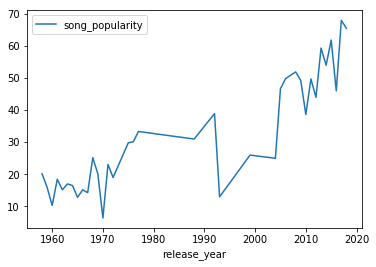

In [9]:
songs_df_group_99 = songs_df_99.groupby(['release_year'])['song_popularity'].mean().reset_index()

songs_df_group_99.plot(x='release_year',y='song_popularity')

In [10]:
songs_df_50 = df[df['best_rank']==50]
songs_df_50.shape


(208, 79)

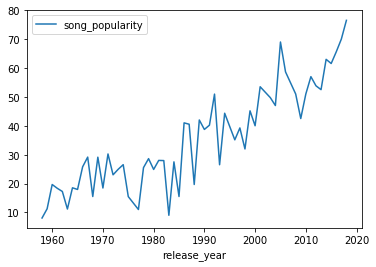

In [11]:
songs_df_group_50 = songs_df_50.groupby(['release_year'])['song_popularity'].mean().reset_index()

songs_df_group_50.plot(x='release_year',y ='song_popularity')

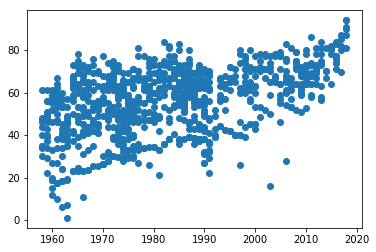

In [12]:
from matplotlib import pyplot as plt

plt.scatter(songs_df['release_year'],songs_df['song_popularity'])

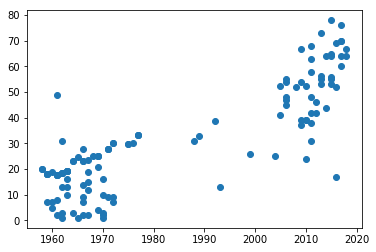

In [13]:
plt.scatter(songs_df_99['release_year'],songs_df_99['song_popularity'])

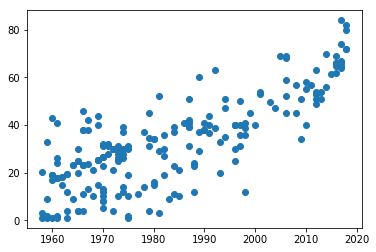

In [14]:
plt.scatter(songs_df_50['release_year'],songs_df_50['song_popularity'])

In [15]:
songs_df['max_std'] = max_std
songs_df['mean_std'] = mean_std
songs_df = songs_df.merge(songs_df_group_mean, on='release_year', how='left')
overperformed_df = songs_df[['title_x','artist_x','release_year','max_std','song_popularity_x','song_popularity_y','mean_std']]
overperformed_df = overperformed_df[(overperformed_df['song_popularity_x'] - overperformed_df['song_popularity_y']) > overperformed_df['max_std']]
print(overperformed_df.shape)
overperformed_df.to_csv('/Users/sayakghosh/Documents/sem1/dsf/project/data-scrapers/overperforming_songs.csv')




(44, 7)


/Users/sayakghosh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/sayakghosh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
underperformed_df = songs_df[['title_x','artist_x','release_year','max_std','song_popularity_x','song_popularity_y','mean_std']]
underperformed_df = underperformed_df[(underperformed_df['song_popularity_x'] - underperformed_df['song_popularity_y']) < (-1.0)* underperformed_df['max_std']]
print(underperformed_df.shape)
underperformed_df.to_csv('/Users/sayakghosh/Documents/sem1/dsf/project/data-scrapers/underperforming_songs.csv')

(84, 7)


In [17]:
overperformed_df_map ={}
for index, row in overperformed_df.iterrows():
    overperformed_df_map[row['title_x']+':'+row['artist_x']] = True

underperformed_df_map ={}
for index, row in underperformed_df.iterrows():
    underperformed_df_map[row['title_x']+':'+row['artist_x']] = True
    
underperformed_df_map    

{'teen angel:Mark Dinning': True,
 'itsy bitsy teenie weenie yellow polkadot bikini:Brian Hyland': True,
 'mr. custer:Larry Verne': True,
 'wonderland by night:Bert Kaempfert And His Orchestra': True,
 'are you lonesome to-night?:Elvis Presley With The Jordanaires': True,
 'calcutta:Lawrence Welk And His Orchestra': True,
 'mother-in-law:Ernie K-Doe': True,
 'wooden heart:Joe Dowell': True,
 'michael:The Highwaymen': True,
 'hit the road jack:Ray Charles and his Orchestra': True,
 'telstar:The Tornadoes': True,
 'easier said than done:The Essex': True,
 'fingertips - pt 2:Little Stevie Wonder': True,
 'hello, dolly!:Louis Armstrong And The All Stars': True,
 'oh, pretty woman:Roy Orbison And The Candy Men': True,
 'leader of the pack:The Shangri-Las': True,
 "i'm telling you now:Freddie And The Dreamers": True,
 "mrs. brown you've got a lovely daughter:Herman's Hermits": True,
 "i'm henry viii, i am:Herman's Hermits": True,
 "lightnin' strikes:Lou Christie": True,
 'the ballad of the g

In [18]:
def set_label(row,overperformed_df_map,underperformed_df_map):
    key_to_check = row['title_x'] +':'+ row['artist_x']
    if (key_to_check in overperformed_df_map):
        return 2
    elif (key_to_check in underperformed_df_map):
        return 0
    else:
        return 1
    
songs_df['class_label'] = songs_df.apply(lambda row:set_label(row,overperformed_df_map,underperformed_df_map),axis=1)
songs_df.groupby(['class_label'])['song_popularity_x'].count().reset_index()

,class_label,song_popularity_x
0,0,84
1,1,781
2,2,44


In [19]:
def label_songs_per_rank(df,rank):
    songs_df = df[df['best_rank']==rank]
    max_popularity = songs_df['song_popularity'].max()
    songs_df_group_mean = songs_df.groupby(['release_year'])['song_popularity'].mean().reset_index()
    max_std = songs_df.groupby(['release_year'])['song_popularity'].std().reset_index()['song_popularity'].max()
    songs_df = songs_df.merge(songs_df_group_mean, on='release_year', how='left')
    overperformed_df = songs_df[['title_x','artist_x','release_year','song_popularity_x','song_popularity_y']]
    overperformed_df = overperformed_df[(overperformed_df['song_popularity_x'] - overperformed_df['song_popularity_y']) > max_std]

    underperformed_df = songs_df[['title_x','artist_x','release_year','song_popularity_x','song_popularity_y']]
    underperformed_df = underperformed_df[(underperformed_df['song_popularity_x'] - underperformed_df['song_popularity_y']) < (-1.0)* max_std]


    overperformed_df_map ={}
    for index, row in overperformed_df.iterrows():
        overperformed_df_map[row['title_x']+':'+row['artist_x']] = True

    underperformed_df_map ={}
    for index, row in underperformed_df.iterrows():
        underperformed_df_map[row['title_x']+':'+row['artist_x']] = True
    
    songs_df['class_label'] = songs_df.apply(lambda row:set_label(row,overperformed_df_map,underperformed_df_map),axis=1)
    return songs_df

final_songs_df = pd.DataFrame()
for i in range (1,101):
    final_songs_df = final_songs_df.append(label_songs_per_rank(df,i))
      
final_songs_df['class_label']        

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     0
26     1
27     2
28     1
29     1
      ..
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
111    1
112    1
113    1
114    1
115    1
116    1
117    1
118    1
119    0
120    1
121    1
122    1
123    1
124    1
125    1
126    1
127    1
Name: class_label, Length: 22860, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
import ast
import numpy as np

le = LabelEncoder()
# final_df['album_name'] = final_df['album_name'].map(lambda x: str(x))

# print(model_df.columns)

model_df = final_songs_df
model_df = model_df.drop(['song_popularity_y'], axis=1)
model_df['delta_y'] = 2018 - model_df['year']


def list_genre(row):
    try:
        #print(row['genre'])
        genre = ast.literal_eval(row['genre'])
        return genre[0]
    except:
        return np.nan

model_df['main_genre'] = model_df.apply(list_genre, axis=1)

model_df['label'] = model_df['label'].map(lambda x: str(x))
model_df['main_genre'] = model_df['main_genre'].map(lambda x: str(x))
# final_df['lyrics'] = final_df['lyrics'].map(lambda x: str(x))
# final_df['album_name'] = final_df['album_name'].map(lambda x: x.lstrip('b\'').rstrip('\''))
columns = ['artist_x', 'title_x', 'label', 'main_genre']

title_artist_df = model_df[['artist_x','title_x']]

for column in columns:
    print(column)
    model_df[column] = le.fit_transform(model_df[column])
    
print(model_df.columns.values)
print(model_df.shape)
    

artist_x
title_x
label
main_genre
['artist_x' 'title_x' 'title_artist' 'album_name' 'total_tracks'
 'release_date_x' 'album_popularity' 'label' 'is_explicit' 'genre'
 'artist_popularity' 'song_popularity_x' 'song_danceability' 'song_energy'
 'song_key' 'song_loudness' 'song_mode' 'song_speechiness'
 'song_acousticness' 'song_instrumentalness' 'song_liveness'
 'song_valence' 'song_tempo' 'song_duration_ms' 'song_time_signature'
 'listeners' 'playcount' 'average_rank_first_year'
 'average_rank_in_billboard' 'average_rank_twenty_years' 'best_rank'
 'best_rank_in_first_year' 'best_rank_in_twenty_years' 'first_date'
 'first_year_rank_change' 'last_date_in_billboard' 'max_run'
 'max_run_first_year' 'max_run_twenty_year' 'release_year'
 'twenty_year_rank_change' 'weeks_in_billboard'
 'weeks_in_billboard_first_year' 'weeks_in_billboard_twenty_years'
 'weeks_in_top_fifty' 'weeks_in_top_fifty_first_year'
 'weeks_in_top_fifty_twenty_years' 'weeks_in_top_ten'
 'weeks_in_top_ten_first_year' 'weeks_

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


def model_random_forest(x_train, y_train):
    model = RandomForestClassifier()
    model.fit(x_train, y_train)
    return model

model_df.dropna(inplace=True)
print(model_df.shape)


feature_columns =['artist_x','title_x','total_tracks',
 'song_danceability','song_energy','song_key',
 'song_loudness','song_mode','song_speechiness','song_acousticness',
 'song_instrumentalness','song_liveness','song_valence','song_tempo',
 'song_duration_ms','song_time_signature','f_k_grade',
 'flesch_index','fog_index','difficult_words','num_syllables','num_words',
 'num_dupes','main_genre','label','Movies_TV_feature_count', 'Oscars_won',
       'Artist_lifetime_grammy_achievement', 'Artist_grammy_wins',
       'Artist_grammy_nominations','TopSongsArtist',
       'Age_Percentage_15_30']


(11946, 82)


In [22]:
 model_df['class_label']

0      1
3      1
4      1
6      1
7      1
9      1
10     1
11     1
12     1
13     1
15     1
19     1
20     1
21     1
22     1
23     1
24     1
25     0
28     1
29     1
30     1
34     1
35     0
36     2
37     1
38     1
41     2
43     1
45     1
48     1
      ..
95     1
98     1
105    1
108    1
109    1
110    1
113    1
115    1
116    1
118    1
122    1
123    1
125    1
126    1
127    1
128    1
129    1
130    1
131    1
132    1
134    1
135    1
136    1
137    1
138    1
140    1
141    1
142    1
143    1
144    1
Name: class_label, Length: 11946, dtype: int64

In [23]:
Y = model_df['class_label']
X_true_one = model_df[model_df['class_label']== 2]
X_true_one = X_true_one[feature_columns]

X = model_df[feature_columns]

model_df.isna().sum()


artist_x                              0
title_x                               0
title_artist                          0
album_name                            0
total_tracks                          0
release_date_x                        0
album_popularity                      0
label                                 0
is_explicit                           0
genre                                 0
artist_popularity                     0
song_popularity_x                     0
song_danceability                     0
song_energy                           0
song_key                              0
song_loudness                         0
song_mode                             0
song_speechiness                      0
song_acousticness                     0
song_instrumentalness                 0
song_liveness                         0
song_valence                          0
song_tempo                            0
song_duration_ms                      0
song_time_signature                   0


In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


trained_model = model_random_forest(x_train, y_train)
print ("Trained model :: ", trained_model)
predictions = trained_model.predict(x_test)

print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

(8959, 32)
(2987, 32)
(8959,)
(2987,)
Trained model ::  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Test Accuracy  ::  0.9691998660863743


In [25]:
predictions = trained_model.predict(X_true_one)
Y_true_ones = np.ones((X_true_one.shape[0]))
print("Test Accuracy  :: ", accuracy_score(Y_true_ones, predictions))


Test Accuracy  ::  0.39403973509933776


In [26]:
print(feature_columns)
print(trained_model.feature_importances_)



['artist_x', 'title_x', 'total_tracks', 'song_danceability', 'song_energy', 'song_key', 'song_loudness', 'song_mode', 'song_speechiness', 'song_acousticness', 'song_instrumentalness', 'song_liveness', 'song_valence', 'song_tempo', 'song_duration_ms', 'song_time_signature', 'f_k_grade', 'flesch_index', 'fog_index', 'difficult_words', 'num_syllables', 'num_words', 'num_dupes', 'main_genre', 'label', 'Movies_TV_feature_count', 'Oscars_won', 'Artist_lifetime_grammy_achievement', 'Artist_grammy_wins', 'Artist_grammy_nominations', 'TopSongsArtist', 'Age_Percentage_15_30']
[0.03989214 0.04104534 0.03231239 0.04580888 0.04049302 0.02184644
 0.04848122 0.00360305 0.04458216 0.04774844 0.03422812 0.03733703
 0.04881781 0.04922065 0.0442322  0.0036373  0.04005716 0.0333765
 0.0318087  0.02984753 0.0381111  0.03115563 0.03518581 0.03093063
 0.03587595 0.02160244 0.         0.006644   0.01111918 0.02087567
 0.01527831 0.03484518]


In [27]:
import operator

features = {}
for i, f in enumerate(trained_model.feature_importances_):
    features[feature_columns[i]] = f
    
sorted_x = sorted(features.items(), key=operator.itemgetter(1))
sorted_x

[('Oscars_won', 0.0),
 ('song_mode', 0.0036030536229334637),
 ('song_time_signature', 0.003637301649612565),
 ('Artist_lifetime_grammy_achievement', 0.0066439975486536),
 ('Artist_grammy_wins', 0.011119184500381959),
 ('TopSongsArtist', 0.015278309139205106),
 ('Artist_grammy_nominations', 0.020875669156929157),
 ('Movies_TV_feature_count', 0.021602437386632086),
 ('song_key', 0.021846443159246855),
 ('difficult_words', 0.029847534439664702),
 ('main_genre', 0.030930627188133535),
 ('num_words', 0.03115563228113317),
 ('fog_index', 0.03180869766994333),
 ('total_tracks', 0.03231238967866387),
 ('flesch_index', 0.033376501003605535),
 ('song_instrumentalness', 0.03422812090392366),
 ('Age_Percentage_15_30', 0.03484517948681344),
 ('num_dupes', 0.035185807100837886),
 ('label', 0.03587595422438652),
 ('song_liveness', 0.03733702805127316),
 ('num_syllables', 0.038111101900195885),
 ('artist_x', 0.039892137825855385),
 ('f_k_grade', 0.040057161599266686),
 ('song_energy', 0.04049301808812

In [28]:
final_songs_df.groupby(['class_label'])['song_popularity_x'].count().reset_index()

,class_label,song_popularity_x
0,0,292
1,1,22190
2,2,378


In [29]:
y_test.nunique()

3

In [30]:
import lightgbm as lgbm

params = {'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class':3,
    'metric': 'multi_logloss',
    'learning_rate': 0.002296,
    'max_depth': 7,
    'num_leaves': 17,
    'feature_fraction': 0.4,
    'bagging_fraction': 0.6,
    'bagging_freq': 17}

train_set = lgbm.Dataset(x_train, y_train)
valid_set = lgbm.Dataset(x_test, y_test)

/Users/sayakghosh/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [31]:
modelLGBM = lgbm.train(params, train_set = train_set, 
            early_stopping_rounds=500, verbose_eval=500, valid_sets=valid_set)

Training until validation scores don't improve for 500 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.842204


In [32]:
names = modelLGBM.feature_name()
imp = modelLGBM.feature_importance()

features = {}
for i, f in enumerate(names):
    features[f] = imp[i]
    
sorted_x = sorted(features.items(), key=operator.itemgetter(1))
sorted_x

[('Oscars_won', 0),
 ('song_time_signature', 1),
 ('song_mode', 19),
 ('TopSongsArtist', 33),
 ('Artist_grammy_wins', 51),
 ('Artist_grammy_nominations', 81),
 ('Artist_lifetime_grammy_achievement', 86),
 ('difficult_words', 93),
 ('song_key', 99),
 ('num_words', 99),
 ('fog_index', 117),
 ('num_syllables', 120),
 ('flesch_index', 125),
 ('f_k_grade', 126),
 ('Movies_TV_feature_count', 131),
 ('num_dupes', 145),
 ('song_tempo', 169),
 ('song_liveness', 174),
 ('song_danceability', 177),
 ('song_energy', 179),
 ('song_acousticness', 179),
 ('label', 202),
 ('title_x', 205),
 ('song_instrumentalness', 209),
 ('Age_Percentage_15_30', 211),
 ('song_valence', 217),
 ('song_loudness', 238),
 ('song_speechiness', 245),
 ('main_genre', 252),
 ('song_duration_ms', 261),
 ('artist_x', 270),
 ('total_tracks', 286)]

In [33]:
billboard_features = ['best_rank','worst_rank','average_rank_first_year',
 'max_run','weeks_in_billboard','year_range_billboard','first_year_rank_change']

model_df = final_songs_df[billboard_features+['song_popularity_x','year','artist_x','title_x']]
billboard_features = billboard_features + ['delta_y']
model_df.dropna(inplace=True)

model_df['delta_y'] = 2018 - model_df['year']

Y_linreg = model_df['song_popularity_x']




/Users/sayakghosh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sayakghosh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
X_linreg = model_df[billboard_features]

Y_linreg.isnull().sum()

0

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X_linreg, Y_linreg)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


def model_linear_regression(x_train, y_train, feature_columns):
    linreg = LinearRegression(normalize=True)
    linreg.fit(x_train, y_train)
    print(linreg.intercept_)
    print(linreg.coef_)
    print(zip(feature_columns, linreg.coef_))
    return linreg

def test_linear_regression_model(linreg, x_test, y_test):
    y_pred = linreg.predict(x_test)
    print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

linreg = model_linear_regression(x_train, y_train, feature_columns)    

72.14143083540185
[ 6.46702671e-02  4.23595692e-02 -3.24396335e-01 -3.80918176e+00
  3.97162913e+00  5.28304963e-01  9.52258243e-04 -7.10361865e-01]


In [37]:
test_linear_regression_model(linreg, x_test, y_test)

13.332977441651398


In [38]:
features = {}
for i, f in enumerate(billboard_features):
    features[f] = linreg.coef_[i]
    
sorted_x = sorted(features.items(), key=operator.itemgetter(1))
sorted_x

[('max_run', -3.8091817590335437),
 ('delta_y', -0.7103618648275162),
 ('average_rank_first_year', -0.32439633507910776),
 ('first_year_rank_change', 0.0009522582433616077),
 ('worst_rank', 0.04235956919596663),
 ('best_rank', 0.06467026711187644),
 ('year_range_billboard', 0.5283049630477483),
 ('weeks_in_billboard', 3.9716291256359106)]

In [39]:
from sklearn.ensemble import RandomForestRegressor

def model_random_forest_regressor(x_train, y_train):
    model = RandomForestRegressor(n_estimators=25, max_features=None, max_depth=25, min_samples_split=3,
                                  min_samples_leaf=2, random_state=0)

    model.fit(x_train, y_train)
    return model

random_forest = model_random_forest_regressor(x_train,y_train)


In [40]:
def test_random_forest(random_forest, x_test, y_test):
    pred = random_forest.predict(x_test)
    error = np.sqrt(metrics.mean_squared_error(y_test, pred))
    print(error)
    
test_random_forest(random_forest, x_test, y_test)    

12.985665065113423


In [41]:
random_forest.feature_importances_

array([0.0738008 , 0.05292647, 0.10844156, 0.08163576, 0.08095848,
       0.04241137, 0.06948949, 0.49033606])

In [42]:
features = {}
for i, f in enumerate(random_forest.feature_importances_):
    features[billboard_features[i]] = f
    
sorted_x = sorted(features.items(), key=operator.itemgetter(1))
sorted_x

[('year_range_billboard', 0.04241136818422173),
 ('worst_rank', 0.0529264736900753),
 ('first_year_rank_change', 0.0694894943479601),
 ('best_rank', 0.0738008046120385),
 ('weeks_in_billboard', 0.08095848315968633),
 ('max_run', 0.08163576036425427),
 ('average_rank_first_year', 0.10844155645504641),
 ('delta_y', 0.4903360591867174)]

In [43]:
params = {'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression'}

train_set = lgbm.Dataset(x_train, y_train)
valid_set = lgbm.Dataset(x_test, y_test)

In [44]:
lgbm_regressor = lgbm.train(params, train_set = train_set, 
            early_stopping_rounds=500, verbose_eval=500, valid_sets=valid_set)

Training until validation scores don't improve for 500 rounds.
Did not meet early stopping. Best iteration is:
[48]	valid_0's l2: 155.81


In [45]:
predictions_lgbm = lgbm_regressor.predict(X_linreg)

predictions_lgbm

array([39.92769004, 42.67990648, 37.45913475, ..., 64.41219971,
       71.53427914, 71.53427914])

In [46]:
def test_lgbm(lgbm_regressor, x_test, y_test):
    pred = random_forest.predict(x_test)
    error = np.sqrt(metrics.mean_squared_error(y_test, pred))
    print(error)
    
test_lgbm(lgbm_regressor, x_test, y_test)    

12.985665065113423


In [47]:
names = lgbm_regressor.feature_name()
imp = lgbm_regressor.feature_importance()

features = {}
for i, f in enumerate(names):
    features[f] = imp[i]
    
sorted_x = sorted(features.items(), key=operator.itemgetter(1))
sorted_x    

[('max_run', 60),
 ('weeks_in_billboard', 72),
 ('year_range_billboard', 150),
 ('worst_rank', 156),
 ('first_year_rank_change', 183),
 ('best_rank', 200),
 ('average_rank_first_year', 247),
 ('delta_y', 372)]

In [48]:
y_pred = lgbm_regressor.predict(X_linreg)
model_df['error'] = Y_linreg - y_pred
model_df['Y_true'] = Y_linreg
model_df['Y_pred'] = y_pred

# predicted_df = model_df[['artist_x','title_x','year','song_popularity_x','Y_true','Y_pred','error']]
predicted_df = model_df

/Users/sayakghosh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sayakghosh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sayakghosh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [49]:
predicted_df = predicted_df.sort_values(by=['error'])
predicted_df

,best_rank,worst_rank,average_rank_first_year,max_run,weeks_in_billboard,year_range_billboard,first_year_rank_change,song_popularity_x,year,artist_x,title_x,delta_y,error,Y_true,Y_pred
173,23.0,89.0,48.300000,20.0,20.0,0.364384,-24.0,2.0,2002.0,Alanis Morissette,hands clean,16.0,-50.075286,2.0,52.075286
175,4.0,97.0,36.869565,23.0,23.0,0.421918,-20.0,1.0,1980.0,George Benson,give me the night,38.0,-49.775528,1.0,50.775528
208,97.0,97.0,97.000000,1.0,1.0,0.000000,0.0,15.0,2017.0,Meek Mill Featuring Lil Uzi Vert,f**k that check up,1.0,-49.412200,15.0,64.412200
267,7.0,94.0,35.277778,18.0,18.0,0.326027,-52.0,2.0,2002.0,Brandy,what about us?,16.0,-48.275130,2.0,50.275130
157,16.0,90.0,38.250000,20.0,20.0,0.364384,6.0,1.0,1999.0,Brandy,almost doesn't count,19.0,-47.886359,1.0,48.886359
190,84.0,95.0,89.500000,2.0,2.0,0.019178,-11.0,11.0,2015.0,Madonna Featuring Nicki Minaj,b**** i'm madonna,3.0,-47.606830,11.0,58.606830
146,7.0,100.0,28.562500,16.0,16.0,0.287671,-41.0,1.0,1978.0,Linda Ronstadt,ooh baby baby,40.0,-46.977910,1.0,47.977910
176,4.0,97.0,37.740741,27.0,27.0,0.498630,-11.0,2.0,1981.0,Ray Parker Jr. & Raydio,a woman needs love (just like you do),37.0,-46.725920,2.0,48.725920
170,13.0,94.0,29.560000,25.0,25.0,0.460274,44.0,2.0,1994.0,Gloria Estefan,"turn the beat around (from ""the specialist"")",24.0,-45.737014,2.0,47.737014
343,3.0,61.0,21.700000,20.0,20.0,0.364384,14.0,10.0,2003.0,Lumidee,"never leave you - uh ooh, uh oooh!",15.0,-44.599447,10.0,54.599447


In [50]:
overperforming_songs = predicted_df[predicted_df['error']> 30]
overperforming_songs

,best_rank,worst_rank,average_rank_first_year,max_run,weeks_in_billboard,year_range_billboard,first_year_rank_change,song_popularity_x,year,artist_x,title_x,delta_y,error,Y_true,Y_pred
125,22.0,99.0,49.684211,19.0,19.0,0.345205,-8.0,69.0,1983.0,Chaka Khan,ain't nobody,35.0,30.064277,69.0,38.935723
139,53.0,87.0,63.437500,16.0,16.0,0.287671,-15.0,71.0,1998.0,The Offspring,pretty fly (for a white guy),20.0,30.120943,71.0,40.879057
59,77.0,80.0,78.750000,4.0,4.0,0.057534,0.0,55.0,1972.0,The Allman Brothers Band,ain't wastin' time no more,46.0,30.138602,55.0,24.861398
28,37.0,93.0,57.818182,11.0,11.0,0.191781,53.0,52.0,1964.0,Patty & The Emblems,"mixed-up, shook-up, girl",54.0,30.180681,52.0,21.819319
133,14.0,98.0,39.769231,13.0,13.0,0.230137,-40.0,70.0,1983.0,Duran Duran,rio,35.0,30.182178,70.0,39.817822
110,87.0,98.0,91.500000,4.0,4.0,0.057534,-7.0,62.0,1986.0,Baltimora,living in the background,32.0,30.210805,62.0,31.789195
119,57.0,95.0,68.300000,10.0,10.0,0.172603,-14.0,65.0,1988.0,Steve Winwood,talking back to the night,30.0,30.222113,65.0,34.777887
81,14.0,58.0,28.555556,9.0,9.0,0.153425,34.0,66.0,1970.0,"Crosby, Stills, Nash & Young",ohio,48.0,30.236889,66.0,35.763111
29,12.0,87.0,33.181818,11.0,11.0,0.191781,53.0,57.0,1962.0,Sam Cooke,nothing can change this love,56.0,30.273659,57.0,26.726341
104,63.0,90.0,71.500000,6.0,6.0,0.095890,27.0,56.0,1976.0,George Benson,breezin',42.0,30.281788,56.0,25.718212


In [51]:
error_mean_year = predicted_df.groupby(['year'])['error'].mean().reset_index()
error_std_year = predicted_df.groupby(['year'])['error'].std().reset_index()

In [52]:
def find_overperforming_songs(df,error_mean_year,error_std_year):
    overperforming_songs = pd.DataFrame()
    underperforming_songs = pd.DataFrame()
    error_mean_map = {}
    for index,row in error_mean_year.iterrows():
        error_mean_map[row['year']] = row['error']
    error_std_map = {}
    for index,row in error_std_year.iterrows():
        error_std_map[row['year']] = row['error']
    
    for index, row in df.iterrows():
        thresold_error_ovp = error_mean_map[row['year']] + (2.5)*error_std_map[row['year']]
        thresold_error_unp = error_mean_map[row['year']] - (2.5)*error_std_map[row['year']]

        if (row['error'] > thresold_error_ovp):
            overperforming_songs = overperforming_songs.append(row)
        elif(row['error'] < thresold_error_unp):   
            underperforming_songs = underperforming_songs.append(row)

    return overperforming_songs,underperforming_songs


overperforming_songs,underperforming_songs = find_overperforming_songs(predicted_df,error_mean_year,error_std_year)
overperforming_songs

,Y_pred,Y_true,artist_x,average_rank_first_year,best_rank,delta_y,error,first_year_rank_change,max_run,song_popularity_x,title_x,weeks_in_billboard,worst_rank,year,year_range_billboard
182,41.903568,63.0,Bruno Mars,50.000000,50.0,6.0,21.096432,0.0,1.0,63.0,runaway baby,1.0,50.0,2012.0,0.000000
180,64.412200,86.0,Lil Uzi Vert,80.000000,80.0,1.0,21.587800,0.0,1.0,86.0,two,1.0,80.0,2017.0,0.000000
215,60.795859,83.0,Drake,86.000000,86.0,2.0,22.204141,0.0,1.0,83.0,views,1.0,86.0,2016.0,0.000000
157,48.366689,72.0,Bruno Mars,92.666667,85.0,8.0,23.633311,-4.0,8.0,72.0,marry you,9.0,100.0,2010.0,0.172603
171,55.262269,79.0,Kings Of Leon,69.100000,56.0,10.0,23.737731,29.0,20.0,79.0,sex on fire,20.0,87.0,2008.0,0.364384
188,51.311861,76.0,The Offspring,74.833333,63.0,10.0,24.688139,11.0,18.0,76.0,"you're gonna go far, kid",18.0,96.0,2008.0,0.326027
188,53.126479,78.0,Avicii,78.000000,78.0,4.0,24.873521,0.0,1.0,78.0,the days,1.0,78.0,2014.0,0.000000
174,46.023209,71.0,Alicia Keys,55.000000,55.0,8.0,24.976791,0.0,1.0,71.0,empire state of mind (part ii) broken down,1.0,55.0,2010.0,0.000000
173,50.692772,76.0,Corinne Bailey Rae,77.842105,64.0,12.0,25.307228,3.0,19.0,76.0,put your records on,19.0,94.0,2006.0,0.345205
169,49.654597,75.0,Panic! At The Disco,87.000000,87.0,5.0,25.345403,0.0,1.0,75.0,this is gospel,1.0,87.0,2013.0,0.000000


In [53]:
underperforming_songs

,Y_pred,Y_true,artist_x,average_rank_first_year,best_rank,delta_y,error,first_year_rank_change,max_run,song_popularity_x,title_x,weeks_in_billboard,worst_rank,year,year_range_billboard
173,52.075286,2.0,Alanis Morissette,48.300000,23.0,16.0,-50.075286,-24.0,20.0,2.0,hands clean,20.0,89.0,2002.0,0.364384
175,50.775528,1.0,George Benson,36.869565,4.0,38.0,-49.775528,-20.0,23.0,1.0,give me the night,23.0,97.0,1980.0,0.421918
208,64.412200,15.0,Meek Mill Featuring Lil Uzi Vert,97.000000,97.0,1.0,-49.412200,0.0,1.0,15.0,f**k that check up,1.0,97.0,2017.0,0.000000
267,50.275130,2.0,Brandy,35.277778,7.0,16.0,-48.275130,-52.0,18.0,2.0,what about us?,18.0,94.0,2002.0,0.326027
157,48.886359,1.0,Brandy,38.250000,16.0,19.0,-47.886359,6.0,20.0,1.0,almost doesn't count,20.0,90.0,1999.0,0.364384
190,58.606830,11.0,Madonna Featuring Nicki Minaj,89.500000,84.0,3.0,-47.606830,-11.0,2.0,11.0,b**** i'm madonna,2.0,95.0,2015.0,0.019178
146,47.977910,1.0,Linda Ronstadt,28.562500,7.0,40.0,-46.977910,-41.0,16.0,1.0,ooh baby baby,16.0,100.0,1978.0,0.287671
176,48.725920,2.0,Ray Parker Jr. & Raydio,37.740741,4.0,37.0,-46.725920,-11.0,27.0,2.0,a woman needs love (just like you do),27.0,97.0,1981.0,0.498630
170,47.737014,2.0,Gloria Estefan,29.560000,13.0,24.0,-45.737014,44.0,25.0,2.0,"turn the beat around (from ""the specialist"")",25.0,94.0,1994.0,0.460274
343,54.599447,10.0,Lumidee,21.700000,3.0,15.0,-44.599447,14.0,20.0,10.0,"never leave you - uh ooh, uh oooh!",20.0,61.0,2003.0,0.364384


In [54]:
underperforming_songs[underperforming_songs['best_rank']==1]

,Y_pred,Y_true,artist_x,average_rank_first_year,best_rank,delta_y,error,first_year_rank_change,max_run,song_popularity_x,title_x,weeks_in_billboard,worst_rank,year,year_range_billboard
165,52.489402,11.000000,The New Vaudeville Band,13.400000,1.0,52.0,-41.489402,22.0,15.0,11.000000,winchester cathedral,15.0,66.0,1966.0,0.268493
91,42.321976,7.000000,Little Stevie Wonder,21.133333,1.0,55.0,-35.321976,24.0,15.0,7.000000,fingertips - pt 2,15.0,85.0,1963.0,0.268493
89,35.977212,1.000000,The Essex,19.615385,1.0,55.0,-34.977212,40.0,13.0,1.000000,easier said than done,13.0,81.0,1963.0,0.230137
713,59.121971,26.000000,Elton John,23.452381,1.0,21.0,-33.121971,-48.0,42.0,26.000000,candle in the wind 1997/something about the wa...,42.0,49.0,1997.0,0.786301
77,38.739113,6.000000,The Tornadoes,22.187500,1.0,56.0,-32.739113,36.0,16.0,6.000000,telstar,16.0,85.0,1962.0,0.287671
100,55.943393,23.271795,Louis Armstrong And The All Stars,17.363636,1.0,54.0,-32.671598,32.0,22.0,23.271795,"hello, dolly!",22.0,76.0,1964.0,0.402740
770,48.091852,16.000000,Clay Aiken,50.562500,1.0,15.0,-32.091852,-96.0,16.0,16.000000,this is the night,16.0,98.0,2003.0,0.287671
74,48.676024,18.377717,"Bobby ""Boris"" Pickett And The Crypt-Kickers",19.214286,1.0,56.0,-30.298307,13.0,35.0,18.377717,monster mash,37.0,94.0,1962.0,11.027397


In [55]:
overperforming_songs['class_label'] = 1
underperforming_songs['class_label'] = 0

outliers_df = overperforming_songs.append(underperforming_songs)
outliers_df.to_csv('/Users/sayakghosh/Documents/sem1/dsf/project/data-scrapers/outliers.csv')
outliers_df.shape

(364, 16)

In [56]:
outliers_model = outliers_df[['artist_x','title_x','class_label','Y_pred','Y_true','delta_y']]
outliers_model['artist_title'] = outliers_df['artist_x'] +':'+ outliers_df['title_x']
outliers_model

/Users/sayakghosh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,artist_x,title_x,class_label,Y_pred,Y_true,delta_y,artist_title
182,Bruno Mars,runaway baby,1,41.903568,63.0,6.0,Bruno Mars:runaway baby
180,Lil Uzi Vert,two,1,64.412200,86.0,1.0,Lil Uzi Vert:two
215,Drake,views,1,60.795859,83.0,2.0,Drake:views
157,Bruno Mars,marry you,1,48.366689,72.0,8.0,Bruno Mars:marry you
171,Kings Of Leon,sex on fire,1,55.262269,79.0,10.0,Kings Of Leon:sex on fire
188,The Offspring,"you're gonna go far, kid",1,51.311861,76.0,10.0,"The Offspring:you're gonna go far, kid"
188,Avicii,the days,1,53.126479,78.0,4.0,Avicii:the days
174,Alicia Keys,empire state of mind (part ii) broken down,1,46.023209,71.0,8.0,Alicia Keys:empire state of mind (part ii) bro...
173,Corinne Bailey Rae,put your records on,1,50.692772,76.0,12.0,Corinne Bailey Rae:put your records on
169,Panic! At The Disco,this is gospel,1,49.654597,75.0,5.0,Panic! At The Disco:this is gospel


In [57]:
df['artist_title'] = df['artist_x'] +':'+ df['title_x']

In [58]:
outliers_model = pd.merge(outliers_model,df,how='left',on='artist_title')

In [59]:
outliers_model.columns

Index(['artist_x_x', 'title_x_x', 'class_label', 'Y_pred', 'Y_true', 'delta_y',
       'artist_title', 'artist_x_y', 'title_x_y', 'title_artist', 'album_name',
       'total_tracks', 'release_date_x', 'album_popularity', 'label',
       'is_explicit', 'genre', 'artist_popularity', 'song_popularity',
       'song_danceability', 'song_energy', 'song_key', 'song_loudness',
       'song_mode', 'song_speechiness', 'song_acousticness',
       'song_instrumentalness', 'song_liveness', 'song_valence', 'song_tempo',
       'song_duration_ms', 'song_time_signature', 'listeners', 'playcount',
       'average_rank_first_year', 'average_rank_in_billboard',
       'average_rank_twenty_years', 'best_rank', 'best_rank_in_first_year',
       'best_rank_in_twenty_years', 'first_date', 'first_year_rank_change',
       'last_date_in_billboard', 'max_run', 'max_run_first_year',
       'max_run_twenty_year', 'release_year', 'twenty_year_rank_change',
       'weeks_in_billboard', 'weeks_in_billboard_first_ye

In [60]:
# billboard_features_new = billboard_features.remove('delta_y')
billboard_features

['best_rank',
 'worst_rank',
 'average_rank_first_year',
 'max_run',
 'weeks_in_billboard',
 'year_range_billboard',
 'first_year_rank_change',
 'delta_y']

In [61]:
outliers_model = outliers_model[['artist_x_x', 'title_x_x', 'class_label', 'Y_pred', 'Y_true', 
       'artist_title', 'album_name',
       'total_tracks', 'album_popularity', 'label',
       'is_explicit', 'genre',
       'song_danceability', 'song_energy', 'song_key', 'song_loudness',
       'song_mode', 'song_speechiness', 'song_acousticness',
       'song_instrumentalness', 'song_liveness', 'song_valence', 'song_tempo',
       'song_duration_ms', 'song_time_signature', 'f_k_grade',
       'flesch_index', 'fog_index', 'difficult_words', 'num_syllables',
       'num_words', 'num_dupes', 'Movies_TV_feature_count', 'Oscars_won',
       'Artist_lifetime_grammy_achievement', 'Artist_grammy_wins',
       'Artist_grammy_nominations', 
       'days_before_charting', 'Age_Percentage_15_30','year']+billboard_features] 
outliers_model['artist'] = outliers_model['artist_x_x']
outliers_model['title'] = outliers_model['title_x_x']
outliers_model

,artist_x_x,title_x_x,class_label,Y_pred,Y_true,artist_title,album_name,total_tracks,album_popularity,label,...,best_rank,worst_rank,average_rank_first_year,max_run,weeks_in_billboard,year_range_billboard,first_year_rank_change,delta_y,artist,title
0,Bruno Mars,runaway baby,1,41.903568,63.0,Bruno Mars:runaway baby,b'Doo-Wops & Hooligans',10.0,82.0,Atlantic Records,...,50.0,50.0,50.000000,1.0,1.0,0.000000,0.0,6.0,Bruno Mars,runaway baby
1,Lil Uzi Vert,two,1,64.412200,86.0,Lil Uzi Vert:two,b'Luv Is Rage 2',16.0,87.0,Generation Now/Atlantic,...,80.0,80.0,80.000000,1.0,1.0,0.000000,0.0,1.0,Lil Uzi Vert,two
2,Drake,views,1,60.795859,83.0,Drake:views,b'Views',20.0,86.0,Cash Money Records/Young Money Ent./Universal ...,...,86.0,86.0,86.000000,1.0,1.0,0.000000,0.0,2.0,Drake,views
3,Bruno Mars,marry you,1,48.366689,72.0,Bruno Mars:marry you,b'Doo-Wops & Hooligans',10.0,82.0,Atlantic Records,...,85.0,100.0,92.666667,8.0,9.0,0.172603,-4.0,8.0,Bruno Mars,marry you
4,Kings Of Leon,sex on fire,1,55.262269,79.0,Kings Of Leon:sex on fire,b'Only By The Night',11.0,80.0,RCA/Legacy,...,56.0,87.0,69.100000,20.0,20.0,0.364384,29.0,10.0,Kings Of Leon,sex on fire
5,The Offspring,"you're gonna go far, kid",1,51.311861,76.0,"The Offspring:you're gonna go far, kid","b'Rise And Fall, Rage And Grace'",12.0,71.0,Round Hill Music (Offspring),...,63.0,96.0,74.833333,18.0,18.0,0.326027,11.0,10.0,The Offspring,"you're gonna go far, kid"
6,Avicii,the days,1,53.126479,78.0,Avicii:the days,b'The Days / Nights',4.0,75.0,Universal Music AB,...,78.0,78.0,78.000000,1.0,1.0,0.000000,0.0,4.0,Avicii,the days
7,Alicia Keys,empire state of mind (part ii) broken down,1,46.023209,71.0,Alicia Keys:empire state of mind (part ii) bro...,b'The Element Of Freedom',14.0,70.0,J Records,...,55.0,55.0,55.000000,1.0,1.0,0.000000,0.0,8.0,Alicia Keys,empire state of mind (part ii) broken down
8,Corinne Bailey Rae,put your records on,1,50.692772,76.0,Corinne Bailey Rae:put your records on,b'Corinne Bailey Rae',11.0,73.0,EMI Records,...,64.0,94.0,77.842105,19.0,19.0,0.345205,3.0,12.0,Corinne Bailey Rae,put your records on
9,Panic! At The Disco,this is gospel,1,49.654597,75.0,Panic! At The Disco:this is gospel,"b'Too Weird To Live, Too Rare To Die!'",10.0,79.0,Decaydance/Fueled By Ramen,...,87.0,87.0,87.000000,1.0,1.0,0.000000,0.0,5.0,Panic! At The Disco,this is gospel


In [62]:
outliers_model = outliers_model.drop(['artist_x_x','title_x_x'], axis=1)


In [63]:
outliers_model.columns

Index(['class_label', 'Y_pred', 'Y_true', 'artist_title', 'album_name',
       'total_tracks', 'album_popularity', 'label', 'is_explicit', 'genre',
       'song_danceability', 'song_energy', 'song_key', 'song_loudness',
       'song_mode', 'song_speechiness', 'song_acousticness',
       'song_instrumentalness', 'song_liveness', 'song_valence', 'song_tempo',
       'song_duration_ms', 'song_time_signature', 'f_k_grade', 'flesch_index',
       'fog_index', 'difficult_words', 'num_syllables', 'num_words',
       'num_dupes', 'Movies_TV_feature_count', 'Oscars_won',
       'Artist_lifetime_grammy_achievement', 'Artist_grammy_wins',
       'Artist_grammy_nominations', 'days_before_charting',
       'Age_Percentage_15_30', 'year', 'best_rank', 'worst_rank',
       'average_rank_first_year', 'max_run', 'weeks_in_billboard',
       'year_range_billboard', 'first_year_rank_change', 'delta_y', 'artist',
       'title'],
      dtype='object')

In [64]:
outliers_model['main_genre'] = outliers_model.apply(list_genre, axis=1)


In [65]:
outliers_model["days_before_charting"] = outliers_model["days_before_charting"].fillna(outliers_model.groupby("year")["days_before_charting"].transform("mean"))

outliers_model["Age_Percentage_15_30"] = outliers_model["Age_Percentage_15_30"].fillna(outliers_model.groupby("year")["Age_Percentage_15_30"].transform("mean"))




In [66]:
outliers_model[['Movies_TV_feature_count','Oscars_won','Artist_lifetime_grammy_achievement','Artist_grammy_wins','Artist_grammy_nominations']]= outliers_model[['Movies_TV_feature_count','Oscars_won','Artist_lifetime_grammy_achievement','Artist_grammy_wins','Artist_grammy_nominations']].fillna(0)

In [67]:
outliers_model["f_k_grade"] = outliers_model["f_k_grade"].fillna(outliers_model.groupby("year")["f_k_grade"].transform("mean"))
outliers_model["flesch_index"] = outliers_model["flesch_index"].fillna(outliers_model.groupby("year")["flesch_index"].transform("mean"))
outliers_model["fog_index"] = outliers_model["fog_index"].fillna(outliers_model.groupby("year")["fog_index"].transform("mean"))
outliers_model["difficult_words"] = outliers_model["difficult_words"].fillna(outliers_model.groupby("year")["difficult_words"].transform("mean"))
outliers_model["num_syllables"] = outliers_model["num_syllables"].fillna(outliers_model.groupby("year")["num_syllables"].transform("mean"))
outliers_model["num_words"] = outliers_model["num_words"].fillna(outliers_model.groupby("year")["num_words"].transform("mean"))
outliers_model["num_dupes"] = outliers_model["num_dupes"].fillna(outliers_model.groupby("year")["num_dupes"].transform("mean"))



In [68]:
outliers_model['main_genre'] = outliers_model['main_genre'].fillna('other')

In [69]:
outliers_model.isna().sum()

class_label                            0
Y_pred                                 0
Y_true                                 0
artist_title                           0
album_name                             2
total_tracks                           2
album_popularity                       2
label                                  2
is_explicit                            2
genre                                 10
song_danceability                      0
song_energy                            0
song_key                               0
song_loudness                          0
song_mode                              0
song_speechiness                       0
song_acousticness                      0
song_instrumentalness                  0
song_liveness                          0
song_valence                           0
song_tempo                             0
song_duration_ms                       0
song_time_signature                    0
f_k_grade                              0
flesch_index    

In [70]:
outliers_model.dropna(inplace=True)

In [71]:
outliers_model.shape

(323, 49)

In [72]:
outliers_model.to_csv('/Users/sayakghosh/Documents/sem1/dsf/project/data-scrapers/outliers_merged.csv',index=False)

In [73]:
columns = ['artist', 'title', 'label', 'main_genre']


for column in columns:
    print(column)
    outliers_model[column] = le.fit_transform(outliers_model[column])

artist
title
label
main_genre


In [74]:
feature_columns =['artist','title','total_tracks',
 'song_danceability','song_energy','song_key',
 'song_loudness','song_mode','song_speechiness','song_acousticness',
 'song_instrumentalness','song_liveness','song_valence','song_tempo',
 'song_duration_ms','song_time_signature','f_k_grade',
 'flesch_index','fog_index','difficult_words','num_syllables','num_words',
 'num_dupes','main_genre','label','Movies_TV_feature_count', 'Oscars_won',
       'Artist_lifetime_grammy_achievement', 'Artist_grammy_wins',
       'Artist_grammy_nominations','Age_Percentage_15_30','delta_y']

Y = outliers_model['class_label']
X = outliers_model[feature_columns]




In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

trained_model = model_random_forest(x_train, y_train)

In [76]:
print(x_train.columns)

Index(['artist', 'title', 'total_tracks', 'song_danceability', 'song_energy',
       'song_key', 'song_loudness', 'song_mode', 'song_speechiness',
       'song_acousticness', 'song_instrumentalness', 'song_liveness',
       'song_valence', 'song_tempo', 'song_duration_ms', 'song_time_signature',
       'f_k_grade', 'flesch_index', 'fog_index', 'difficult_words',
       'num_syllables', 'num_words', 'num_dupes', 'main_genre', 'label',
       'Movies_TV_feature_count', 'Oscars_won',
       'Artist_lifetime_grammy_achievement', 'Artist_grammy_wins',
       'Artist_grammy_nominations', 'Age_Percentage_15_30', 'delta_y'],
      dtype='object')


In [77]:
len(trained_model.feature_importances_)

32

In [78]:
print(feature_columns)

['artist', 'title', 'total_tracks', 'song_danceability', 'song_energy', 'song_key', 'song_loudness', 'song_mode', 'song_speechiness', 'song_acousticness', 'song_instrumentalness', 'song_liveness', 'song_valence', 'song_tempo', 'song_duration_ms', 'song_time_signature', 'f_k_grade', 'flesch_index', 'fog_index', 'difficult_words', 'num_syllables', 'num_words', 'num_dupes', 'main_genre', 'label', 'Movies_TV_feature_count', 'Oscars_won', 'Artist_lifetime_grammy_achievement', 'Artist_grammy_wins', 'Artist_grammy_nominations', 'Age_Percentage_15_30', 'delta_y']


In [79]:
features = {}
for i, f in enumerate(trained_model.feature_importances_):
    features[feature_columns[i]] = f
    
sorted_x = sorted(features.items(), key=operator.itemgetter(1))
sorted_x

[('song_time_signature', 0.0),
 ('Oscars_won', 0.0),
 ('Artist_lifetime_grammy_achievement', 0.0),
 ('fog_index', 0.004689395767945871),
 ('song_speechiness', 0.0050930007897895795),
 ('song_mode', 0.005681131536639172),
 ('song_valence', 0.0078083297745108),
 ('num_syllables', 0.011436832804978859),
 ('difficult_words', 0.012919125632682873),
 ('f_k_grade', 0.013393874142093939),
 ('song_instrumentalness', 0.0151269291863373),
 ('song_danceability', 0.015391469621905296),
 ('Artist_grammy_wins', 0.01844607937949863),
 ('artist', 0.01855794568629912),
 ('Movies_TV_feature_count', 0.01910453661294264),
 ('song_key', 0.02057189906208287),
 ('song_tempo', 0.021853346739288432),
 ('title', 0.024600218575940098),
 ('num_words', 0.029035777828413788),
 ('song_duration_ms', 0.03161060108167692),
 ('Artist_grammy_nominations', 0.03399794249980574),
 ('label', 0.036091544095499584),
 ('num_dupes', 0.03668407358872089),
 ('flesch_index', 0.03983691618653183),
 ('song_energy', 0.04291235120964162

In [80]:
predictions = trained_model.predict(x_test)

print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Test Accuracy  ::  0.8641975308641975
